# K Nearest Neighbors
An example of how to classify data points using K Nearest Neighbors

The data from the Institute of Agrophysics of the Polish Academy of Sciences in Lublin consists of three different varieties of wheat: Kama, Rosa and Canadian. There are 70 elements of each, randomly selected for an experiment.

The data includes:
* Area (A) - area of the seed
* Perimeter (P) - perimeter of the seed
* Compactness = 4*pi*A/P2
* Kernel_length - Length of the seed
* Kernel_width - Width of the seed
* Asymmetry_coef - The coefficient of asymmetry for the seed
* Groove_length - the length of the groove down the middle of the seed
* Seed - the class of seed (Kama, Rosa, or Canadian)

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("data/seeds.csv")

## 2. Understanding the Data

In [3]:
df.info()
df.head()
df["seed"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   kernel_length   210 non-null    float64
 4   kernel_width    210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   groove_length   210 non-null    float64
 7   seed            210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


seed
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64

We can create a multi-class classifcation model using all the feautres and the label "seed".

## 3. Feature Selection

### 3.1. Forward Selection

When K = 5

In [4]:
# TODO: Modify your code for Forward Selection to work for KNN
# Be sure to resplit your training and test data every time you
# add a new feature with a random_state=5.
features = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coef', 'groove_length']
y = df["seed"]
model = KNeighborsClassifier(n_neighbors=5)
best_score = 0
best_feature = None
selected_features = []
length = len(features)
for i in range(length):
    best_score = 0
    best_feature = None
    for feature in features:
        X = df[[feature] + selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
        model = model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_test, y_test) 
        # print("Feature:", feature, "Best Score:", best_score, "Score:", score)
        if score > best_score:
            best_score = score
            best_feature = feature
    selected_features.append(best_feature)
    features.remove(best_feature)
    print("Added: ", best_feature)
    # print("Selected Features:", selected_features, "Score:", best_score)

Added:  perimeter
Added:  asymmetry_coef
Added:  compactness
Added:  kernel_length
Added:  kernel_width
Added:  groove_length
Added:  area


When K = 10

In [5]:
features = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coef', 'groove_length']
y = df["seed"]
model = KNeighborsClassifier(n_neighbors=10)
best_score = 0
best_feature = None
selected_features = []
length = len(features)
for i in range(length):
    best_score = 0
    best_feature = None
    for feature in features:
        X = df[[feature] + selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
        model = model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_test, y_test) 
        # print("Feature:", feature, "Best Score:", best_score, "Score:", score)
        if score > best_score:
            best_score = score
            best_feature = feature
    selected_features.append(best_feature)
    features.remove(best_feature)
    print("Added: ", best_feature)
    # print("Selected Features:", selected_features, "Score:", best_score)

Added:  area
Added:  asymmetry_coef
Added:  perimeter
Added:  compactness
Added:  kernel_length
Added:  kernel_width
Added:  groove_length


1. When we change the value of K, the model is looking at a differnet amount of the closest points in order to evaluate what features should be added. So when k=5 it looks at the 5 closest points while at k=10 it looks at the closest 10 points
2. I would recommend the second model where k=10 considering that their are 210 different values in the data set I think it is a more representative number of points to look at increasing the accuracy. 

## 4. Building our Model

In [6]:
df.columns

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coef', 'groove_length', 'seed'],
      dtype='object')

In [7]:
# Extract Data
X = df[['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coef', 'groove_length']]
y = df["seed"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Create the model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model = model.fit(X_train, y_train)


## 5. Evaluation

In [8]:
print(X_test)

      area  perimeter  compactness  kernel_length  kernel_width  \
21   14.11      14.26       0.8722          5.520         3.168   
53   14.33      14.28       0.8831          5.504         3.199   
120  20.24      16.91       0.8897          6.315         3.962   
51   15.78      14.91       0.8923          5.674         3.434   
26   13.02      13.76       0.8641          5.395         3.026   
198  12.62      13.67       0.8481          5.410         2.911   
107  17.63      15.86       0.8800          6.033         3.573   
28   14.11      14.18       0.8820          5.541         3.221   
6    14.69      14.49       0.8799          5.563         3.259   
157  12.13      13.73       0.8081          5.394         2.745   
202  11.18      12.72       0.8680          5.009         2.810   
25   16.19      15.16       0.8849          5.833         3.421   
42   13.16      13.55       0.9009          5.138         3.201   
116  18.96      16.20       0.9077          6.051         3.89

In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

y_pred

array(['Kama', 'Kama', 'Rosa', 'Rosa', 'Kama', 'Canadian', 'Rosa', 'Kama',
       'Kama', 'Canadian', 'Canadian', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Kama', 'Canadian', 'Canadian', 'Rosa', 'Rosa', 'Rosa', 'Canadian',
       'Canadian', 'Canadian', 'Rosa', 'Kama', 'Canadian', 'Rosa',
       'Canadian', 'Kama', 'Kama', 'Canadian', 'Canadian', 'Canadian',
       'Rosa', 'Kama', 'Canadian', 'Canadian', 'Rosa', 'Canadian', 'Kama',
       'Rosa'], dtype=object)

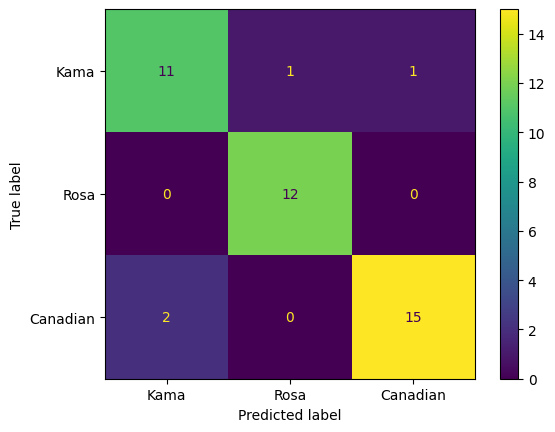

In [10]:
# Create a confusion matrix
labels = df["seed"].unique()
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot()


In [11]:
# Accuracy as shown by confusion matrix
model.score(X_test, y_test)

0.9047619047619048